Initial guess of r for when V(r) is at a min: 2.0   Angstroms
Final value of r for when V(r) is at a min:   3.816 Angstroms
Number of steps taken is: 12


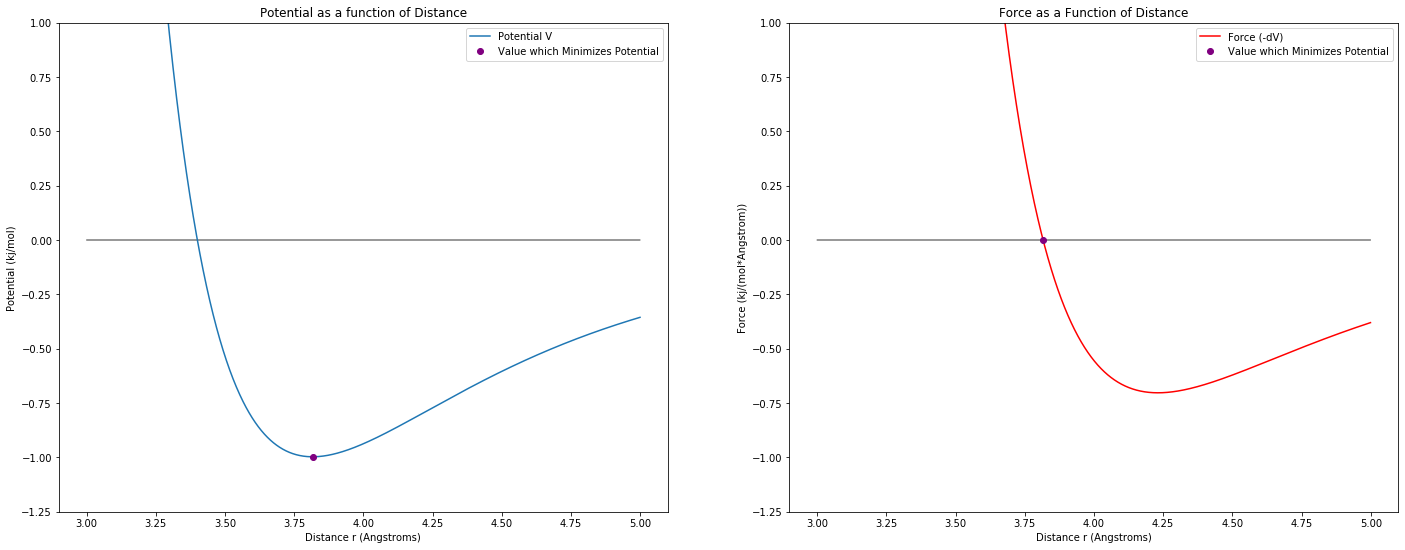

In [105]:
"""
    This script explores properties of the  intermolecular  interaction  between  two  Argon  (Ar)  
    atoms  with  the  Lennard-Jones  potential:
                    
                                    V(r) = 4ϵ((σ/r)^12 - (σ/r)^6)
                                    
    ϵ = well-depth
    σ = distance when potential is 0 between 2 particles
    
    Experimental values for ϵ and σ are given as 0.997 kj/mol and 3.40 Angstroms respectively.
    This script does 2 things:
        i) Finds the value of r that minimizes V(r) using Newton Raphson
        ii) Plots 2 graphs: V(r) x r and F(r) x r
"""
import math
import numpy as np
import matplotlib.pylab as plt


# Constants given by experimental values
epsilon = 0.997
sigma = 3.40
# tolerance for Newton-Raphson Method (How precise we would like our distance that minimizes the potential)
tol = 0.00001
initialGuess = 2.0


# Helper Functions

# Takes in a distance r (float)in Angstroms, and returns the Lennard Jones potential of that value of 
# r in kj/mol
def LennardJones(r):
    return 4.0*epsilon*((sigma/r)**12 - (sigma/r)**6)

# Takes in a distance r in Angstroms, and returns the derivative of the Lennard Jones potential 
# of that value of r in kj/mol*Angstroms
def LennardJonesDerivative(r):
    return 24*epsilon*(sigma**6)/r**7 *(1 - 2*sigma**6 / r**6)

# Takes in a distance r (float) in Angstroms, and returns the second derivative of the Lennard Jones 
# potential of that value of r in kj/mol*Angstroms^2
def LennardJonesDerivative2(r):
    return 24*epsilon*(26*sigma**12 / r**14 - 7*sigma**6 / r**8)

# Takes in an initial guess distance r (float) in Angstroms, and uses the Newton Raphson Method to 
# calculate the value of r which makes the derivative of V(r) equal to 0. It also prints the initial
# guess, the final value of r, and the number of steps it took to reach it.
def NewtonRaphson(r):
    # Initialize nsteps variable and print it
    nSteps = 0
    print('Initial guess of r for when V(r) is at a min: ' + str(r) + '   Angstroms')
    # While the derivative of the potential is larger than tolerance, calculate the next r using 
    # Newton_Raphson Method and update the nsteps variable
    while (math.fabs(LennardJonesDerivative(r)) > tol):
        r = r -  LennardJonesDerivative(r)/ LennardJonesDerivative2(r)
        nSteps += 1
    # Print final results and return it
    print('Final value of r for when V(r) is at a min:   ' + str(round(r, 3)) + ' Angstroms')
    print('Number of steps taken is: ' + str(nSteps - 1))
    return r
    


# Script

# Calculate r value that minimizes the potential
minimum = NewtonRaphson(initialGuess)

# create lists of potential and negative derivative of the potential (Force) to graph the results
rlist = np.arange(3.0,5.0 , 0.001)
Vlist = []
dVlist = []
for i in rlist:
    Vlist.append(LennardJones(i))
    dVlist.append(LennardJonesDerivative(-i))
# Graph 1
fig= plt.figure(figsize=(24,9))
plt.subplot(1,2,1)
plt.plot(rlist, 0.0 * rlist, linewidth='0.8', color='black')
plt.plot(rlist, Vlist, label='Potential V')
plt.plot(minimum, LennardJones(minimum), 'o', color='purple', label='Value which Minimizes Potential')
plt.title("Potential as a function of Distance")
plt.xlabel("Distance r (Angstroms)")
plt.ylabel("Potential (kj/mol)")
plt.ylim(-1.25, 1.0)
plt.legend(loc="upper right")
# Graph 2
plt.subplot(1,2,2)
plt.plot(rlist, 0.0 * rlist, linewidth='0.8', color='black')
plt.plot(rlist, dVlist, color='red', label='Force (-dV)')
plt.plot(minimum, LennardJonesDerivative(minimum), 'o', color='purple', label='Value which Minimizes Potential')
plt.title("Force as a Function of Distance")
plt.xlabel("Distance r (Angstroms)")
plt.ylabel("Force (kj/(mol*Angstrom))")
plt.legend(loc="upper right")
plt.ylim(-1.25, 1.0)
plt.show()
